In [1]:
# for datasets in sim 3- counts are generated so that the ratios are close the real data noise level 2 

In [2]:
# Order of correlations: [rho_alpha_beta, rho_alpha_nu, rho_alpha_gamma, rho_beta_nu, rho_beta_gamma, rho_nu_gamma]
# Order of sigmas : [sigma_log_alpha, sigma_log_beta, sigma_log_nu, sigma_log_gamma]
# Order of means : [alpha,beta,nu,gamma]

# config_simulation = {'parameters':{ 'n_obs':800,
#     'n_vars':300,
#     'alpha':5,
#     'beta':10,
#     'nu' :0.33,
#     'gamma':0.32,
#     'alpha_':0,
#     't_max':20,
#     'noise_model':"normal",
#     'noise_level':2,
#     }, 

#     'options': {'generate_parameters':False,
#                 'generate_switch_times':True,
#                   'save':False,
#                   'saving_path':None
#                   },
#     }


# config_preprocessing = {'preprocess_params': {
#      'min_counts': 200, 
#      'min_cells': 5,
#      'n_neighbors': 23,
#      'n_pcs': 0,
#      'min_dist': 1},
# 'functions_to_apply': {'filter_cells': True, 
#                        'filter_genes': True, 
#                        'normalize_total': True,
#                        'log1p': True,
#                        'pca': True,
#                        'neighbors': True,
#                        'umap': True,
#                        'leiden': True,
#                        'moments': True}}


# # config_velocity = { 'velocity_types': ['dynamical','deterministic','stochastic','velovi']}
# config_velocity = { 'velocity_types': ['deterministic','stochastic','dynamical']}



# config_plotting = {
#     'colorsets': ['leiden', 'clusters'],
#     'velocity_embedding_stream': True,
#     'velocity_embedding_grid': True,
#     'velocity_embedding': True,
#     'rank_velocity_genes': True,
#     'velocity_confidence': True,
#     'velocity_length': True
# }



In [3]:
import os
from pathlib import Path
import sys
import numpy as np
import scvelo as scv

In [4]:
notebook_dir = os.getcwd()
notebook_dir

'c:\\Users\\OmerCagatayTalikaci\\Desktop\\github\\STVelo\\notebooks\\analysis\\nu_beta_effects'

In [5]:
Path(notebook_dir).parents[3]

WindowsPath('c:/Users/OmerCagatayTalikaci/Desktop/github')

In [6]:
os.chdir(Path(notebook_dir).parents[3])

In [7]:
stvelo_path = os.path.join(os.getcwd(),'STVelo','stvelo')

import sys  
sys.path.insert(1,stvelo_path)

from pipelines.metrics import *
from pipelines.utils import proportions_nuc_cyto

# Read adatas 

In [8]:
adata_folder_path = os.path.join(os.getcwd(), 'data', 'beta_big') 

In [9]:
import os
import anndata as ad


# Initialize an empty dictionary to store the AnnData objects
adata_dict = {}

# Loop through all files in the folder
for file_name in os.listdir(adata_folder_path):
    # Check if the file has .h5ad extension
    if file_name.endswith('.h5ad'):
        # Remove the file extension to use as the dictionary key
        key = os.path.splitext(file_name)[0]
        
        # Read the .h5ad file and store it in the dictionary
        adata_dict[key] = scv.read(os.path.join(adata_folder_path, file_name))

# Now, adata_dict contains the .h5ad files with keys as their filenames without extension


In [10]:
adatas = {k:v.copy() for k,v in adata_dict.items()}

# n_obs = 800

In [11]:
import matplotlib.pyplot as plt 

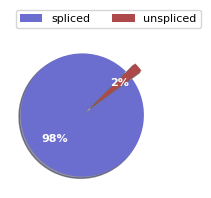

In [12]:
scv.pl.proportions(adata_dict['adata_s_u_800obs_300genes_deterministic'])

<Axes: >

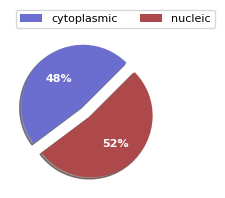

In [13]:
proportions_nuc_cyto(adata_dict['adata_n_c_800obs_300genes_deterministic'])

In [14]:
adata_dict['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    242
True      58
Name: count, dtype: int64

In [15]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes'].value_counts()

velocity_genes
False    224
True      76
Name: count, dtype: int64

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


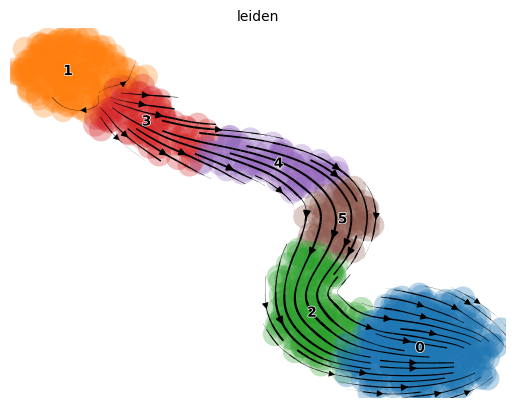

In [16]:
scv.pl.velocity_embedding_stream(adata_dict['adata_s_u_800obs_300genes_deterministic'], basis='umap', color='leiden')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


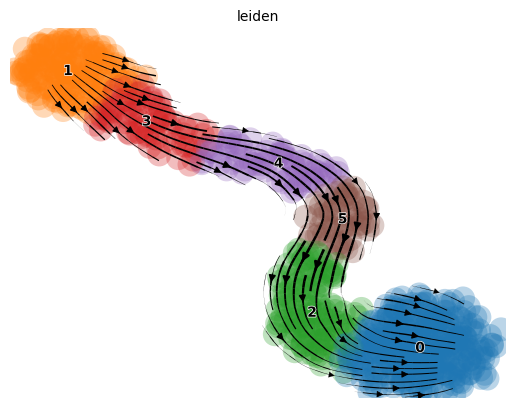

In [17]:
scv.pl.velocity_embedding_stream(adata_dict['adata_n_c_800obs_300genes_deterministic'], basis='umap', color='leiden')

# Metrics 

# Confidence 

- Confidence metric measures the mean velocity consistency by calculating the pearson correlation between a cell and its neighbours. Let $v(x_j)$ be the velocity of cell $x_j$. Confidence $c_j$ is given by;

$$c_j = \frac{1}{k} \sum_{x \in \mathit{N_k(x_j)} } corr(v(x_j),v(x))$$

where $\mathit{N_k(x_j)}$ is the k-neighbours of $x_j$ in KNN graph.


sc.pp.neighbors(adata) > scv.tl.velocity() > scv.tl.velocity_graph() to compute cosine corr. > scv.tl.velocity_confidence()

In [18]:
for d in adata_dict.keys():
    print(d)
    adata_dict[d]=compute_confidence(adata_dict[d])

adata_n_c_1000obs_300genes_deterministic
computing velocity graph (using 2/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_dynamical
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
adata_n_c_1000obs_300genes_stochastic
computing velocity graph (using 2/24 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> adde

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

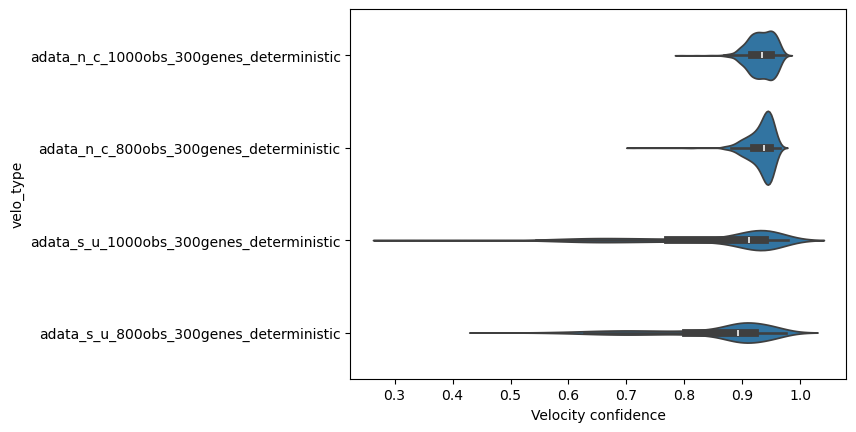

In [19]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("deterministic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

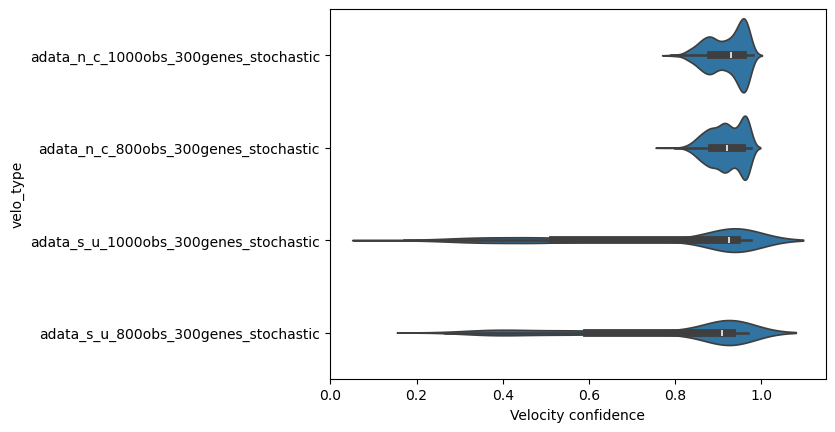

In [20]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("stochastic")],x='Velocity confidence',y='velo_type')

<Axes: xlabel='Velocity confidence', ylabel='velo_type'>

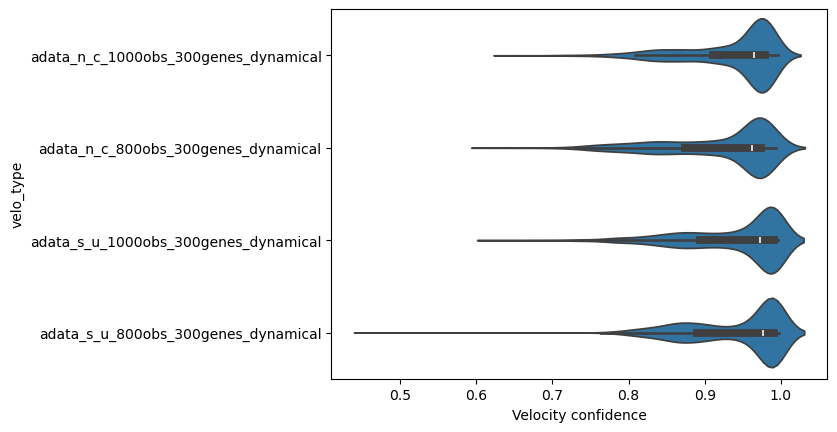

In [21]:
import seaborn as sns
confidences=get_confidences(adata_dict)
sns.violinplot(data=confidences[confidences['velo_type'].str.endswith("dynamical")],x='Velocity confidence',y='velo_type')

In [22]:
import matplotlib.pyplot as plt

# Velocity Correlation by gene

Checks if the velocities calculated for the same gene in different modalities are consistent. 

In [23]:
[adata_dict[k] for k in ['adata_s_u_800obs_300genes_deterministic','adata_n_c_800obs_300genes_deterministic']]

[AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_gamma', 'true_scaling', 'n_cells', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
     uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'leiden_colors'
     obsm: 'X_pca', 'X_umap', 'velocity_umap'
     varm: 'PCs'
     layers: 'Ms', 'Mu', 'spliced', 'spliced_cyt', 'true_velocity', 'unspliced', 'velocity'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 800 × 300
     obs: 'true_t', 'n_counts', 'leiden', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'Velocity confidence'
     var: 'true_t_', 'true_alpha', 'true_beta', 'true_nu', 'true_g

In [40]:
adata_dict.keys()

dict_keys(['adata_n_c_1000obs_300genes_deterministic', 'adata_n_c_1000obs_300genes_dynamical', 'adata_n_c_1000obs_300genes_stochastic', 'adata_n_c_800obs_300genes_deterministic', 'adata_n_c_800obs_300genes_dynamical', 'adata_n_c_800obs_300genes_stochastic', 'adata_s_u_1000obs_300genes_deterministic', 'adata_s_u_1000obs_300genes_dynamical', 'adata_s_u_1000obs_300genes_stochastic', 'adata_s_u_800obs_300genes_deterministic', 'adata_s_u_800obs_300genes_dynamical', 'adata_s_u_800obs_300genes_stochastic'])

In [44]:
adata_800 = {'adata_n_c_800obs_300genes_deterministic': adata_dict['adata_n_c_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_deterministic': adata_dict['adata_s_u_800obs_300genes_deterministic'].copy(),
             'adata_s_u_800obs_300genes_stochastic': adata_dict['adata_s_u_800obs_300genes_stochastic'].copy(),
             'adata_n_c_800obs_300genes_stochastic': adata_dict['adata_n_c_800obs_300genes_stochastic'].copy(),
             'adata_s_u_800obs_300genes_dynamical': adata_dict['adata_s_u_800obs_300genes_dynamical'].copy(),
             'adata_n_c_800obs_300genes_dynamical': adata_dict['adata_n_c_800obs_300genes_dynamical'].copy()
             }

In [45]:
velocity_correlation_by_gene=velocity_corr_against_reference(adata_800,reference='adata_s_u_800obs_300genes_deterministic', mode= 'by_gene')

In [46]:
velocity_correlation_by_gene

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
adata_n_c_800obs_300genes_deterministic,0.915495,0.963702,0.916742,0.914588,0.855777,0.929897,0.903983,0.907438,0.905881,0.841042,...,0.821532,0.580203,0.933443,0.564558,0.890184,0.626332,0.435663,0.932581,0.910213,0.934245
adata_s_u_800obs_300genes_deterministic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
adata_s_u_800obs_300genes_stochastic,0.995446,1.000000,0.995827,1.000000,0.986198,1.000000,0.990514,1.000000,1.000000,0.978278,...,0.973994,1.000000,1.000000,1.000000,0.994267,1.000000,1.000000,1.000000,1.000000,1.000000
adata_n_c_800obs_300genes_stochastic,0.915495,0.963702,0.916742,0.914588,0.855777,0.929897,0.903983,0.907438,0.905881,0.841042,...,0.738476,0.580203,0.933443,0.470025,0.890184,0.499240,0.435663,0.932581,0.910213,0.934245
adata_s_u_800obs_300genes_dynamical,0.785109,NaN,0.178489,0.924866,0.806782,0.984165,0.716291,NaN,NaN,0.857789,...,0.809544,0.666614,NaN,0.705248,0.968998,0.611297,0.574988,NaN,NaN,NaN
adata_n_c_800obs_300genes_dynamical,NaN,NaN,NaN,NaN,0.652603,NaN,0.618273,NaN,NaN,0.614727,...,0.584272,-0.014923,NaN,-0.133084,0.721649,0.181241,-0.429815,NaN,NaN,NaN


In [58]:
velocity_correlation_by_gene.iloc[1:]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
adata_s_u_800obs_300genes_deterministic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
adata_s_u_800obs_300genes_stochastic,0.995446,1.000000,0.995827,1.000000,0.986198,1.000000,0.990514,1.000000,1.000000,0.978278,...,0.973994,1.000000,1.000000,1.000000,0.994267,1.000000,1.000000,1.000000,1.000000,1.000000
adata_n_c_800obs_300genes_stochastic,0.915495,0.963702,0.916742,0.914588,0.855777,0.929897,0.903983,0.907438,0.905881,0.841042,...,0.738476,0.580203,0.933443,0.470025,0.890184,0.499240,0.435663,0.932581,0.910213,0.934245
adata_s_u_800obs_300genes_dynamical,0.785109,NaN,0.178489,0.924866,0.806782,0.984165,0.716291,NaN,NaN,0.857789,...,0.809544,0.666614,NaN,0.705248,0.968998,0.611297,0.574988,NaN,NaN,NaN
adata_n_c_800obs_300genes_dynamical,NaN,NaN,NaN,NaN,0.652603,NaN,0.618273,NaN,NaN,0.614727,...,0.584272,-0.014923,NaN,-0.133084,0.721649,0.181241,-0.429815,NaN,NaN,NaN


Text(0, 0.5, 'Modality')

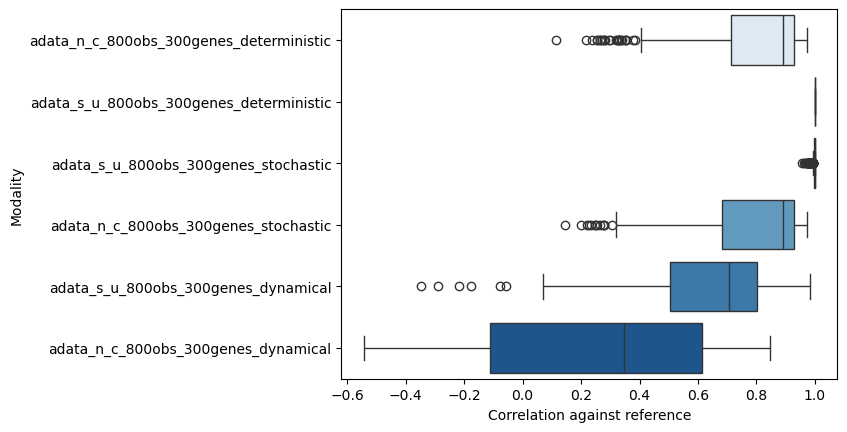

In [60]:
# velocity corr against a reference 
# import matplotlib.pyplot as plt
# sns.clustermap(velocity_correlation_by_gene.fillna(0),figsize=(7,4),cmap='Blues')
# sns.scatterplot(velocity_correlation_by_gene[:1].T)
# plt.figure(figsize=(5,5))
sns.boxplot(data=velocity_correlation_by_gene.stack().reset_index(),y='level_0',x=0,palette='Blues')
plt.xlabel('Correlation against reference')
plt.ylabel('Modality')


- It looks like the model capture more or less the same dynamics for the genes in two modalities. Investigate lover correlations:

In [27]:
velo_genes_s_u = adata_800['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']
velo_genes_n_c = adata_800['adata_n_c_800obs_300genes_deterministic'].var['velocity_genes']

In [28]:
print(velo_genes_n_c.value_counts(),velo_genes_s_u.value_counts())

velocity_genes
False    242
True      58
Name: count, dtype: int64 velocity_genes
False    224
True      76
Name: count, dtype: int64


In [29]:
adata_dict['adata_s_u_800obs_300genes_deterministic'].var[adata_dict['adata_s_u_800obs_300genes_deterministic'].var['velocity_genes']==False].head()

,true_t_,true_alpha,true_beta,true_nu,true_gamma,true_scaling,n_cells,velocity_gamma,velocity_qreg_ratio,velocity_r2,velocity_genes
1,11.693030,5.0,10.0,0.33,0.32,1.0,800,0.017589,0.017589,-0.253219,False
3,9.146825,5.0,10.0,0.33,0.32,1.0,796,0.020615,0.020615,-0.011679,False
5,10.683662,5.0,10.0,0.33,0.32,1.0,798,0.018545,0.018545,-0.053939,False
7,14.277057,5.0,10.0,0.33,0.32,1.0,800,0.017701,0.017701,-2.492573,False
8,15.445262,5.0,10.0,0.33,0.32,1.0,800,0.017066,0.017066,-4.461061,False


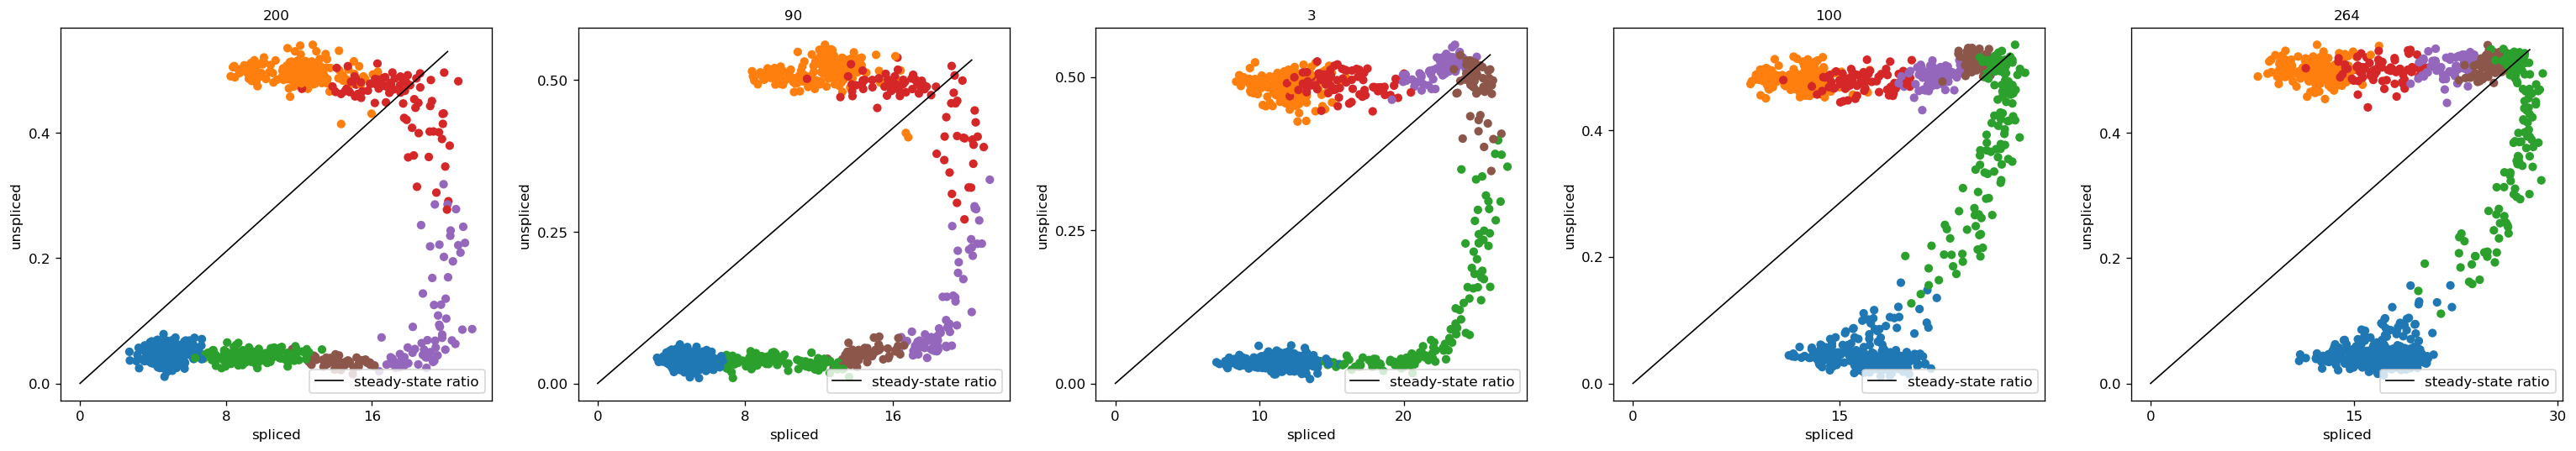

In [62]:
scv.pl.scatter(adata_dict['adata_s_u_800obs_300genes_deterministic'],color="leiden", basis=['200','90','3','100','264'], ncols=5, frameon=True,dpi=120,)

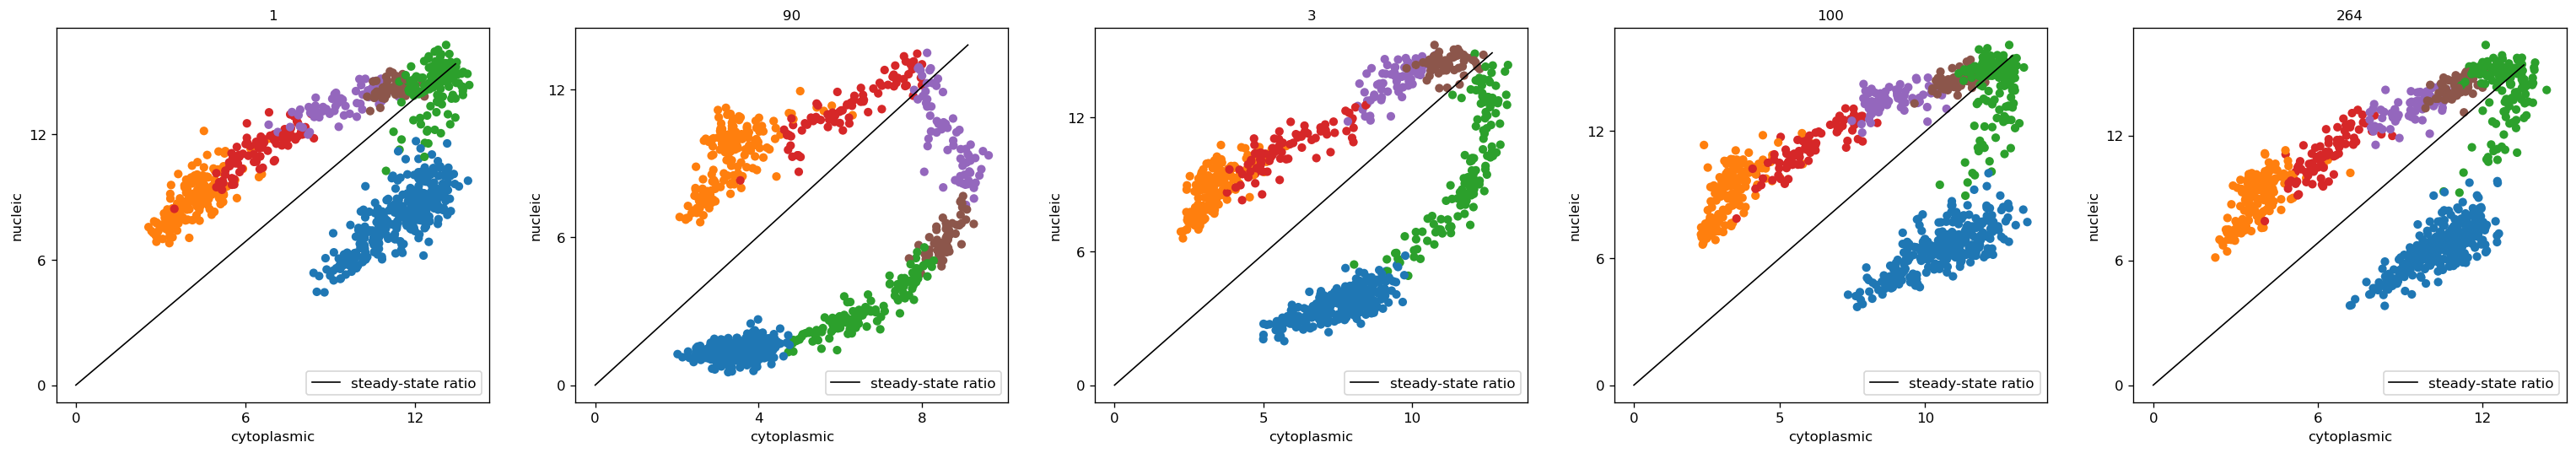

In [31]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'],color="leiden", basis=['1','90','3','100','264'], ncols=5, frameon=True,dpi=120,ylabel='nucleic',xlabel='cytoplasmic')

# Check the important genes 

In [32]:
scv.tl.rank_velocity_genes(adata_dict['adata_s_u_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)
scv.tl.rank_velocity_genes(adata_dict['adata_n_c_800obs_300genes_deterministic'], groupby='leiden', min_corr=.3)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [33]:
dfs = scv.get_df(adata_dict['adata_s_u_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfs.head(5)

,0,1,2,3,4,5
0,272,131,272,157,157,157
1,167,235,65,288,232,86
2,65,195,167,161,11,11
3,29,51,235,6,288,288
4,131,269,157,195,86,232


In [34]:
dfn = scv.get_df(adata_dict['adata_n_c_800obs_300genes_deterministic'].uns['rank_velocity_genes']['names'])
dfn.head(5)

,0,1,2,3,4,5
0,233,224,99,222,76,166
1,34,293,233,76,238,196
2,283,211,214,101,101,214
3,97,196,204,30,222,204
4,166,247,283,85,230,34


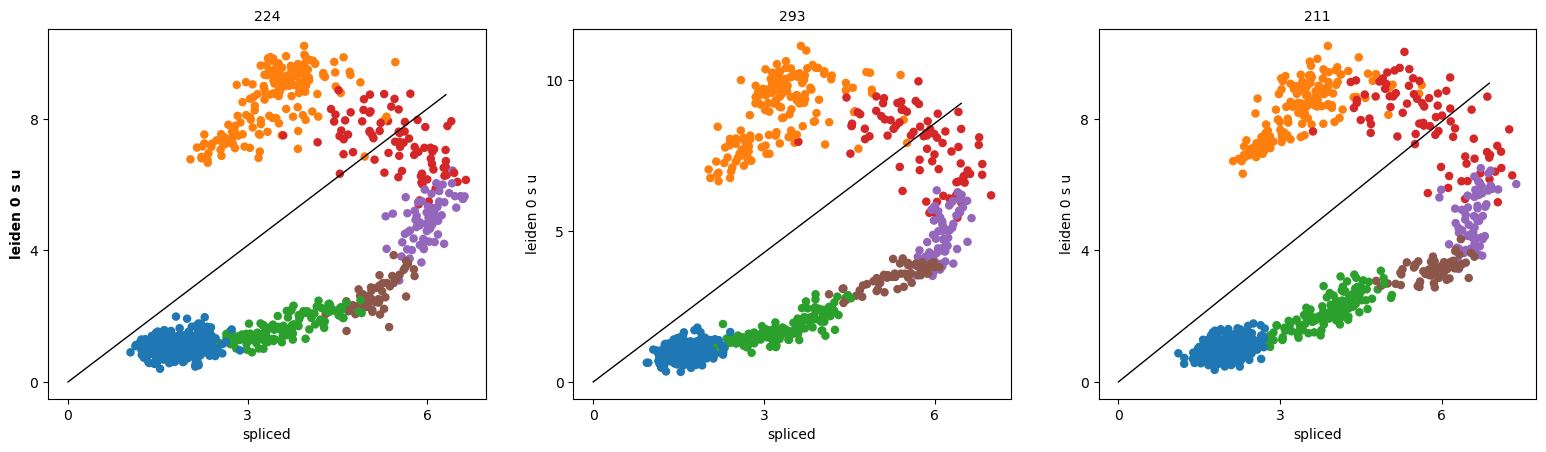

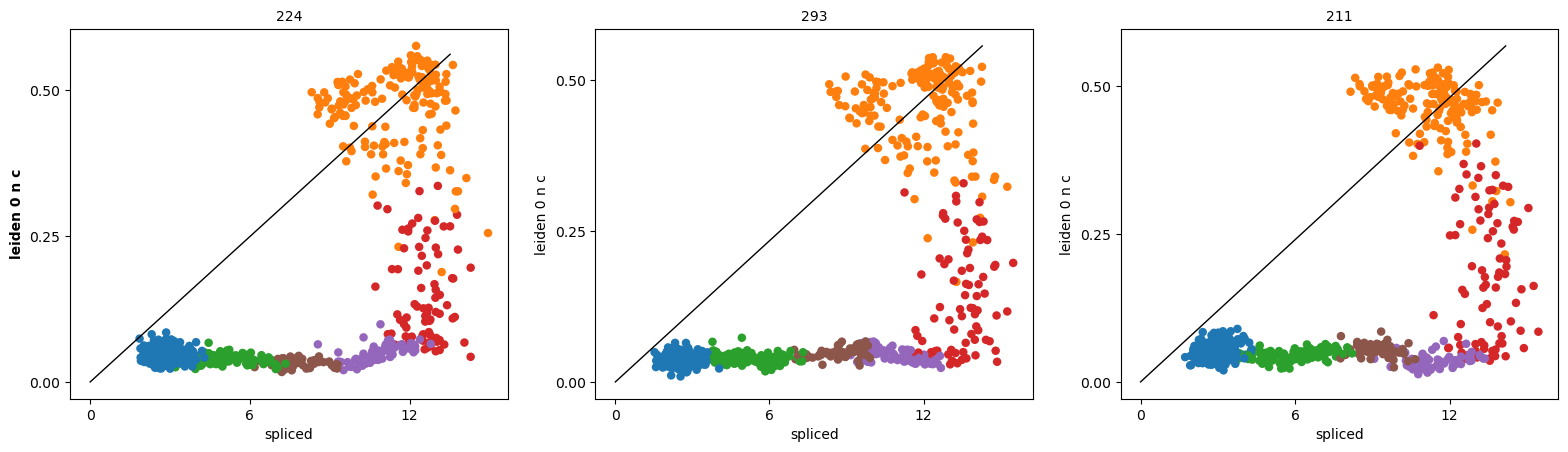

In [38]:
scv.pl.scatter(adata_dict['adata_n_c_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 s_u', color='leiden')
scv.pl.scatter(adata_dict['adata_s_u_800obs_300genes_deterministic'], dfn['1'][:3], ylabel='leiden 0 n_c', color= 'leiden')

In [36]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_n_c_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5
velocity_length,8.433510,13.034303,11.832248,15.076124,14.080882,12.573036
velocity_confidence,0.920089,0.940501,0.943415,0.933165,0.937237,0.936334


In [37]:
keys = ['velocity_length', 'velocity_confidence']
df = adata_dict['adata_s_u_800obs_300genes_deterministic'].obs.groupby('leiden')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

leiden,0,1,2,3,4,5
velocity_length,0.374768,0.277758,0.644341,0.410625,1.250441,1.515714
velocity_confidence,0.905642,0.712241,0.804935,0.873209,0.952325,0.945201
